<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#전처리,-명사추출" data-toc-modified-id="전처리,-명사추출-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>전처리, 명사추출</a></span></li><li><span><a href="#노이즈-제거" data-toc-modified-id="노이즈-제거-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>노이즈 제거</a></span></li><li><span><a href="#문서검색" data-toc-modified-id="문서검색-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>문서검색</a></span></li><li><span><a href="#유의어,-불용어-처리" data-toc-modified-id="유의어,-불용어-처리-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>유의어, 불용어 처리</a></span></li><li><span><a href="#벡터화(DTM)" data-toc-modified-id="벡터화(DTM)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>벡터화(DTM)</a></span><ul class="toc-item"><li><span><a href="#LDA" data-toc-modified-id="LDA-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>LDA</a></span><ul class="toc-item"><li><span><a href="#알맞은-topic갯수-찾기" data-toc-modified-id="알맞은-topic갯수-찾기-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>알맞은 topic갯수 찾기</a></span></li><li><span><a href="#LDA-실행" data-toc-modified-id="LDA-실행-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>LDA 실행</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
import datetime
import re
from ckonlpy.tag import Twitter
from gensim.models import Word2Vec
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
import newsight

In [3]:
newsight.readme()

******Description*****
code by 현호킴, description by 승현백
클래스 이름.help() : 해당 클래스에서 사용할 수 있는 함수 출력
******Class names******
1) 데이터 불러오기 : Pickle2DF
2) 전처리 : PreprocessingText
3) 불용어,유의어 처리 : GetSimilarWords, GetStopWords
4) 문서 검색 :  GetDocsFromQuery
5) 벡터화 :  Vectorizer
6) 시각화 : Get2DPlot, AnalyzingNewsData, WordCloud
7) 이상치 제거 : CleaningNoise
8) 키워드 추출 : GetKeyword
수정사항은 history 함수를 참고하세효


## 데이터 불러오기

In [4]:
newsight.Pickle2DF().help()

******Pickle2DF******
1) get_dataframe(피클 경로(str)) : 피클을 데이터프레임으로 반환
2) get_dataframe_from_list(피클 경로를 저장한 리스트(list)) : 피클여러개를 데이터프레임으로 반환
**********************


In [18]:
mirae_list = ['data/미래에셋대우/rawdata_미래에셋대우.pickle']
blizzard_list = ['data/블리자드/rawdata_경향신문_블리자드.pickle',
                'data/블리자드/rawdata_국민일보_블리자드.pickle',
                'data/블리자드/rawdata_동아일보_블리자드.pickle',
                'data/블리자드/rawdata_디지털타임즈_블리자드.pickle',
                'data/블리자드/rawdata_매일경제_블리자드.pickle',
                'data/블리자드/rawdata_머니투데이_블리자드.pickle',
                'data/블리자드/rawdata_문화일보_블리자드.pickle',
                'data/블리자드/rawdata_서울신문_블리자드.pickle',
                'data/블리자드/rawdata_세계일보_블리자드.pickle',
                'data/블리자드/rawdata_아주경제_블리자드.pickle',
                'data/블리자드/rawdata_전자신문_블리자드.pickle',
                'data/블리자드/rawdata_조선일보_블리자드.pickle',
                'data/블리자드/rawdata_중앙일보_블리자드.pickle',
                'data/블리자드/rawdata_한겨레_블리자드.pickle',
                'data/블리자드/rawdata_한국경제_블리자드.pickle',
                'data/블리자드/rawdata_한국일보_블리자드.pickle',
                ]
ahnlab_list = ['data/안랩/rawdata_경향신문_안랩.pickle',
                'data/안랩/rawdata_국민일보_안랩.pickle',
                'data/안랩/rawdata_동아일보_안랩.pickle',
                'data/안랩/rawdata_디지털타임즈_안랩.pickle',
                'data/안랩/rawdata_매일경제_안랩.pickle',
                'data/안랩/rawdata_머니투데이_안랩.pickle',
                'data/안랩/rawdata_문화일보_안랩.pickle',
                'data/안랩/rawdata_서울신문_안랩.pickle',
                'data/안랩/rawdata_세계일보_안랩.pickle',
                'data/안랩/rawdata_아주경제_안랩.pickle',
                'data/안랩/rawdata_전자신문_안랩.pickle',
                'data/안랩/rawdata_조선일보_안랩.pickle',
                'data/안랩/rawdata_중앙일보_안랩.pickle',
                'data/안랩/rawdata_한겨레_안랩.pickle',
                'data/안랩/rawdata_한국경제_안랩.pickle',
                'data/안랩/rawdata_한국일보_안랩.pickle',
                ]
tmax_list = ['data/티맥스/rawdata_경향신문_티맥스.pickle',
           'data/티맥스/rawdata_국민일보_티맥스.pickle',
           'data/티맥스/rawdata_동아일보_티맥스.pickle',
           'data/티맥스/rawdata_디지털타임즈_티맥스.pickle',
           'data/티맥스/rawdata_매일경제_티맥스.pickle',
           'data/티맥스/rawdata_머니투데이_티맥스.pickle',
           'data/티맥스/rawdata_문화일보_티맥스.pickle',
           'data/티맥스/rawdata_서울신문_티맥스.pickle',
           'data/티맥스/rawdata_세계일보_티맥스.pickle',
           'data/티맥스/rawdata_아주경제_티맥스.pickle',
           'data/티맥스/rawdata_전자신문_티맥스.pickle',
           'data/티맥스/rawdata_조선일보_티맥스.pickle',
           'data/티맥스/rawdata_중앙일보_티맥스.pickle',
           'data/티맥스/rawdata_한겨레_티맥스.pickle',
           'data/티맥스/rawdata_한국경제_티맥스.pickle',
           'data/티맥스/rawdata_한국일보_티맥스.pickle',
           ]
hansam_list = ['data/한샘/rawdata_한샘_8100.pickle',]

socar_list = ['data/SOCAR/rawdata_SOCAR_2000.pickle',]

data_list = mirae_list

In [19]:
data_loader = newsight.Pickle2DF()
df = data_loader.get_dataframe_from_list(data_list)

In [20]:
df.head()

,date,title,content,category,date_tmp
0,2019-04-19,"NH투자證 `선택과 집중` 통했다…펀드설정액, 증권사 1위에 올라",지난해 말 조직개편을 통해 펀드 판매에 승부수를 띄운 NH투자증권이 올해 들어 금융...,"[경제>증권_증시, 경제>금융_재테크, 경제>유통]",737168
1,2019-04-19,"2차전지 기업들, 속속 '코스닥 입성' 채비","코윈테크, 8월 코스닥 상장 추진 \n \n \n[ 이우상 기자 ] 2차전지 생산용...","[경제>산업_기업, 경제>증권_증시, 경제>금융_재테크]",737168
2,2019-04-19,증시 호조에 증권株 `훨훨`…2분기 실적도 `맑음`,올해 들어 증시가 호조를 보이면서 증권주들이 1분기 양호한 성적표를 받아들었다. 이...,"[경제>증권_증시, 경제>금융_재테크, 경제>국제경제]",737168
3,2019-04-19,"한화 LifePlus TDF 설정 1년, 4% 대 운용성과 달성",한화 라이프플러스 상장지수펀드(ETF)의 수익률이 설정 이후 양호한 수익률을 올리고...,"[경제>금융_재테크, 경제>증권_증시, 경제>국제경제]",737168
4,2019-04-19,"미래에셋벤처투자의 사회적기업1호펀드, 72.4% 수익 올리고 청산돼",미래에셋벤처투자는 지난 2011년 42억원으로 결성했던 사회적기업1호펀드가 72.4...,"[경제>산업_기업, 경제>증권_증시, 경제>국제경제]",737168


In [21]:
# N개만 가져와서 테스트 
import random
rand_idx = random.sample(range(len(df)), 10000)
df_2 = df.iloc[rand_idx].copy()
df_2.shape

(10000, 5)

## 전처리, 명사추출

In [22]:
preprocessor = newsight.PreprocessingText()
preprocessor.help()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


******PreprocessingText******
1) make_content_re(df['컬럼이름'](Series)) : 입력받은 열을 전처리 후 시리즈로 반환
2) add_noun_dict('list') : 명사 사전에 단어 추가
3) add_stopwords('list') : 불용어 사전에 단어 추가
4) tokenize(df['컬럼이름'](Series)) : 입력받은 열을 토큰화한 후 시리즈로 반환
*****************************


In [23]:
# 명사 추가
filename = '미래에셋_단어사전.txt'
with open(filename) as file_object:
    contents = file_object.read()
noun_list = contents.split('\n')
preprocessor.add_noun_dict(noun_list)

추가한 명사
['정보통신', '환헤지', '조웅기', '핀테크', '큐레이션', '투명성', '최경주', '상장', '임직원', '아시아그로쓰', '라이징스타', '파이낸셜', '캡스', '리파이낸싱', '싱가포르투자청', '도이체방크', '도이치뱅크', '카우룽', '그린마크', '광주은행', '대신증권', '삼성생명', '신한은행', '우리은행', '유안타증권', '펀드슈퍼마켓', '한국투자증권', '기업은행', '하나은행', '제일은행', '퀀트모델', '포트폴리오', '헤지펀드', '트레이딩', '영업점', '셀렉션', '구인', '사업화', '협약식', '미래에셋센터원', '최연소', '이테크', '미래에셋', '미래에셋대우', '에트리홀딩스', '펀드설정액', '분기', '벤처', '사회적기업', '성장지원', '헬스케어', '해결책', '메리츠', '신고가', '지주', '증권주', '벨류에이션', '이베스트', '수익성', '실사구시', '페어트레이딩', '쓸어', '상장사', '한투', '한국투자증권', '순매수', '거래량', '상장주식수', '분기', '미상환', '업무지구', '장기적', '한온시스템', '보여', '주간사', '젠바디', '예탁결제원', '크라우드펀딩', '영업이익률', '이익률', '파워리퍼블릭', '운용사', '아모텍', '지분', '박스권', '저평가', '시총', '긍정적', '납세자', '셀리드', '에스퓨얼셀', '게임사', '할인율', '재도전', '인공지능', '당기순익', '비대면', '사업가치', '재평가', '순매도', '순매수', '수혜주', '마중물', '혼조세', '신고가', '합리적', '재취업', '다각화', '자문형랩', '순익', '설정액', '원소재', '메디톡스', '인허가', '성장통', '호실적', '주간사', '주관사', '예상치', '호실적', '압도', '신성장', '기술료', '조기상환', '비임원', '기대감', '순매도', '저평가', '거래량', '내수', '건설사', 

In [24]:
df.head()

,date,title,content,category,date_tmp
0,2019-04-19,"NH투자證 `선택과 집중` 통했다…펀드설정액, 증권사 1위에 올라",지난해 말 조직개편을 통해 펀드 판매에 승부수를 띄운 NH투자증권이 올해 들어 금융...,"[경제>증권_증시, 경제>금융_재테크, 경제>유통]",737168
1,2019-04-19,"2차전지 기업들, 속속 '코스닥 입성' 채비","코윈테크, 8월 코스닥 상장 추진 \n \n \n[ 이우상 기자 ] 2차전지 생산용...","[경제>산업_기업, 경제>증권_증시, 경제>금융_재테크]",737168
2,2019-04-19,증시 호조에 증권株 `훨훨`…2분기 실적도 `맑음`,올해 들어 증시가 호조를 보이면서 증권주들이 1분기 양호한 성적표를 받아들었다. 이...,"[경제>증권_증시, 경제>금융_재테크, 경제>국제경제]",737168
3,2019-04-19,"한화 LifePlus TDF 설정 1년, 4% 대 운용성과 달성",한화 라이프플러스 상장지수펀드(ETF)의 수익률이 설정 이후 양호한 수익률을 올리고...,"[경제>금융_재테크, 경제>증권_증시, 경제>국제경제]",737168
4,2019-04-19,"미래에셋벤처투자의 사회적기업1호펀드, 72.4% 수익 올리고 청산돼",미래에셋벤처투자는 지난 2011년 42억원으로 결성했던 사회적기업1호펀드가 72.4...,"[경제>산업_기업, 경제>증권_증시, 경제>국제경제]",737168


In [25]:
df_pre_1 = preprocessor.make_content_re(df.content) # 전처리

In [26]:
df_pre_2 = preprocessor.tokenize(df_pre_1) # 명사 추출

추가한 명사: ['정보통신', '환헤지', '조웅기', '핀테크', '큐레이션', '투명성', '최경주', '상장', '임직원', '아시아그로쓰', '라이징스타', '파이낸셜', '캡스', '리파이낸싱', '싱가포르투자청', '도이체방크', '도이치뱅크', '카우룽', '그린마크', '광주은행', '대신증권', '삼성생명', '신한은행', '우리은행', '유안타증권', '펀드슈퍼마켓', '한국투자증권', '기업은행', '하나은행', '제일은행', '퀀트모델', '포트폴리오', '헤지펀드', '트레이딩', '영업점', '셀렉션', '구인', '사업화', '협약식', '미래에셋센터원', '최연소', '이테크', '미래에셋', '미래에셋대우', '에트리홀딩스', '펀드설정액', '분기', '벤처', '사회적기업', '성장지원', '헬스케어', '해결책', '메리츠', '신고가', '지주', '증권주', '벨류에이션', '이베스트', '수익성', '실사구시', '페어트레이딩', '쓸어', '상장사', '한투', '한국투자증권', '순매수', '거래량', '상장주식수', '분기', '미상환', '업무지구', '장기적', '한온시스템', '보여', '주간사', '젠바디', '예탁결제원', '크라우드펀딩', '영업이익률', '이익률', '파워리퍼블릭', '운용사', '아모텍', '지분', '박스권', '저평가', '시총', '긍정적', '납세자', '셀리드', '에스퓨얼셀', '게임사', '할인율', '재도전', '인공지능', '당기순익', '비대면', '사업가치', '재평가', '순매도', '순매수', '수혜주', '마중물', '혼조세', '신고가', '합리적', '재취업', '다각화', '자문형랩', '순익', '설정액', '원소재', '메디톡스', '인허가', '성장통', '호실적', '주간사', '주관사', '예상치', '호실적', '압도', '신성장', '기술료', '조기상환', '비임원', '기대감', '순매도', '저평가', '거래량', '내수', '건설사',

In [36]:
df['content_re'] = df_pre_1
df['tokenized_doc'] = df_pre_2

In [37]:
df.tokenized_doc = df.tokenized_doc.apply(lambda x: [ i for i in x if len(i) > 1 ]) # 한글자 제거
df.tokenized_doc.head()

0    [지난해, 조직개편, 통해, 펀드, 판매, 부수, 투자, 증권, 올해, 금융, 가장...
1    [코윈, 테크, 코스닥, 상장, 추진, 전지, 생산, 설비, 제조, 기업인, 코윈,...
2    [올해, 증시, 호조, 보이, 면서, 증권주, 양호, 성적표, 아들, 었다, 증권,...
3    [한화, 라이프, 플러스, 장지수, 펀드, 수익률, 설정, 이후, 양호, 수익률, ...
4    [미래에셋, 벤처, 투자, 지난, 억원, 결성, 사회적기업, 펀드, 수익, 지난달,...
Name: tokenized_doc, dtype: object

## 노이즈 제거

In [38]:
def count_topic(tokenized_doc, topic):
    counting = []
    for news in tokenized_doc:
        counting.append(news.count(topic))
    return counting

def plot_hist(counting):
    counting_pd = pd.Series(counting)
    bins = len(counting_pd.value_counts())
    counting_pd.hist(figsize=(16, 12), bins=bins+20)
    plt.xlabel("counting", fontsize=14)
    plt.show()

def get_proper_news(data, counting, threshold):
    select = np.array(counting) >= threshold
    print('number of total data:', len(data))
    print('number of proper data:', sum(select))
    return data[select].copy()

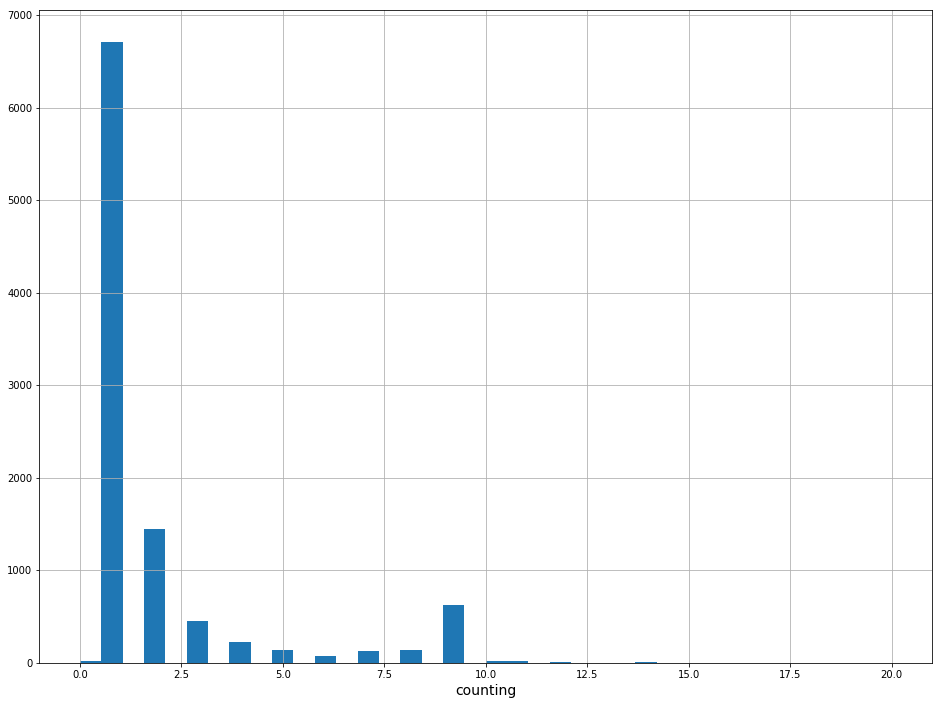

In [42]:
counting = count_topic(df.tokenized_doc, "미래에셋대우")
plot_hist(counting)

In [167]:
# 원하는 타이틀만 가져오기
"""tmp_list = [] 
for i in range(df.shape[0]) :
    if '미래에셋' in df['title'][i] :
        tmp_list.append(True)
    else :
        tmp_list.append(False)"""

In [43]:
data = get_proper_news(df_pre_2, counting, threshold=3)

number of total data: 10000
number of proper data: 1829


## 문서검색

In [44]:
doc_selector = newsight.GetDocsFromQuery()
doc_selector.help()

******GetDocsFromQuery******
1)set_query(검색어(str)) : 검색어 설정 
2)select_news(데이터프레임(DataFrame),title) : 검색어를 포함한 문서를 시리즈로 반환, title = True 면 제목에 쿼리를 포함한 문서 인덱스 반환
*****************************


In [45]:
doc_selector.set_query('미래에셋대우')

In [62]:
query_docs = doc_selector.select_news(data)

KeyError: 'content'

In [171]:
query_docs.head()

0    [쏘카, 다가, 장애인, 하루, 동안, 쏘카, 휠체어, 슬로, 어시스트, 차량, 장...
1    [쏘카, 로고, 쏘카, 장애인, 장애인, 어시스트, 쏘카, 휠체어, 슬로, 차량, ...
2    [지난, 네이버, 로부터, 투자, 유치, 실내, 정밀, 위치, 측정, 기술, 스타트...
3    [배용준, 투자, 폴라, 리언, 인수, 미래, 먹거리, 선제, 투자, 차량, 공유,...
4    [차량, 공유, 기업, 쏘카, 전기차, 시장, 테슬라, 잡고, 차량, 공유, 시장,...
Name: tokenized_doc, dtype: object

## 유의어, 불용어 처리

In [49]:
similar_words = GetSpecialWords.GetSimilarWords()
similar_words.help()

AttributeError: module 'newsight' has no attribute 'GetSimilarWords'

In [ ]:
#similar_words.get_similar_words('투자')

In [ ]:
#similar_words.get_model(query_docs,size = 300)

In [52]:
GetSpecialWords = newsight.GetSpecialWords()

In [64]:
GetSpecialWords.get_bow(data)
GetSpecialWords.get_stop_words(300) # 출현 빈도 상위,하위 10위 단어 출력

의견
목표
투자
미래에셋대우
매수
주가
제시
유지
것
최근
원
증권
적
컨센서스
이번
증권사
발표
억원
종목
대비
분석
등
전
대한
시장
조정
기준
전체
풀
수준
및
리포트
고
제공
추이
또한
평균
로
국내
매매
기업
이
수
대해
체적
기
실적
로봇
면서
이익
의
비교
오늘
일자
상승
까지
가격
해외
영업
변화
글로벌
한편
말
를
금융
볼때
직전
점
동사
증가
매출
올해
전망
하향
가가
주식
금융투자
가장
이후
예상
폭
경우
라며
하락
중
상향
기대감
사업
수익
현
내
성장
업체
최저
부문
분기
표현
삼성
기록
동안
거래
개
추세
위
크게
지난해
주
액
집계
수렴
애널리스트
기사
객관
개월
최고
바
미래에셋
기대
자산
모습
정보
역시
보수
전일
해석
지속
개선
고객
요인
규모
종가
준
전자신문
동향
현재
대하
상태
처리
만원
균
실시간
흐름
때문
참고
이상
공격
통계
코멘트
가평
분기기
하이라이트
계속
평가
회
감소
투자자
법인
업계
제일
중국
배당
그대로
신규
통해
지난
조원
한국투자증권
달
수익률
순이익
치
존재
추가
확대
회장
후
차례
진행
며
해
하나
상
상품
저평가
부터
그룹
조억원
서비스
비중
업종
억
가능성
풀이
기관
더
위해
회사
명
두
다가
개인
미국
초반
관련
당하
센터
연금
율
약
다소
유
펀드
연속
관리
한국
가의
판단
가능
전자
안
인수
지하
추정
은행
발행
총
부진
최대
관계자
비
주요
홍콩
대표
수수료
더욱
달러
나타
은
년
신한
때
외국인
아지
조
그
트레이딩
다시
화
각각
주주
초과
원대
일
비용
전략
률
성
위험
지분
사
자본
상장
판매
예정
강화
계획
수익성
형
성과
설명
매물
선
기존
금융업
장
부동산
퇴직
정도
현지
간
하반기
대상
효과
경영
손실
디지털
영향
상황
제
향후
한화
수요
발생
참여
긍정적
롯데
배
메리츠
지급
세
경협과
정몽윤
택자
면직
중부로
랭커
부러
웨
극상
히키
사혁
포스코건설
박성순
무안
무게중심
이규
셰어
강남구
시술
와스프
이지스
단서
민씨
득세
적경
방망이
무상증자
정면
다린
형기
렌즈
거북이


In [65]:
a = '''
미래에셋대우
제시
유지
것
최근
원
적
이번
억원
대비
등
전
대한
시장
조정
기준
전체
풀
수준
및
리포트
고
추이
또한
로
이
수
대해
체적
기
면서
의
비교
오늘
일자
상승
까지
한편
말
를
볼때
직전
점
동사
올해
가가
가장
이후
예상
폭
경우
라며
중
기대감
현
내
최저
부문
분기
표현
기록
동안
개
위
크게
지난해
주
액
집계
수렴
애널리스트
기사
객관
개월
최고
바
미래에셋
기대
모습
정보
역시
보수
전일
해석
지속
개선
요인
준
전자신문
동향
현재
대하
상태
처리
만원
균
실시간
흐름
때문
참고
이상
공격
통계
코멘트
가평
분기기
하이라이트
계속
회
감소
제일
그대로
신규
통해
지난
조원
달
치
존재
추가
확대
후
차례
며
해
하나
상
부터
조억원
비중
억
가능성
풀이
더
위해
명
두
다가
개인
초반
관련
당하
율
약
다소
유
연속
관리
한국
가의
판단
가능
전자
안
인수
지하
추정
총
최대
관계자
비
주요
더욱
달러
나타
은
년
때
아지
조
그
트레이딩
다시
화
각각
초과
원대
일
률
성
사
예정
강화
수익성
형
설명
매물
선
기존
장
정도
현지
간
하반기
대상
효과
영향
상황
제
향후
수요
발생
참여
긍정적
배
지급
세
경협과
택자
면직
중부로
랭커
부러
웨
극상
히키
사혁
무안
무게중심
이규
셰어
강남구
시술
단서
민씨
득세
적경
방망이
정면
다린
형기
렌즈
거북이
기정
가추
찍기
라돈
장밋빛
출입
무진행
고요
출동
단절
설자리
미술품
반지
터닝
열전
금호아시아나
말문
보대
월이자지급
은한
해설
비책
컷오프
일상생활
흉내
이자보
직관
이병
드이
촉진
파일
이주일
과반수
리엘
놨다
부리
하이패스
교육학
신동빈
이스라엘
불변
진정서
리메이크
툴
마음껏
알레
학내
배곧
감점
황산니켈
팅되
웠
버거
송구
불로
오죽
마인
항고심
뮤직비디오
토린
어울
라빅
출퇴근시간
소강
중책
양쪽
변재
제로섬
주최
덴탈디텍터
소시
로얄
독립시
백전노장
띤
회로
동대문
큐티
징후
생중계
닉티
팬클럽
극한
김수연
용적
력도
반신반의
웅용
통솔
토론토
클리오
간접세
월세
크라운
신발
배증
끈끈
뭇
진취
정말
수의사
무임
수신
준정
골도
증세
복용
단부
이온
돌기
의제
해선
주창
거시
스트로
대개
토양
안승
양화로
출산
제헌
유태인
서천
로베코샘
안간힘
카트
소극
굿
컴공
미익
배상하
혼합형
김충
레퍼토리
다이너마이트
리뱀핑
섬
예치
타국
외국산
노미
년새
리도
우직
지옥
박강
지칭
치레
일동
살림살이
설태
점증
륙할지
화북
어지
치명
피나
재건
애물
최민
처우
가요
산유
배후
군집
축구장
국제대
처마
여실히
광복
금보
영속
청담러닝
롱숏
선례
김준섭
평동
피로
바퀴
분루
유해
원정
불의
극성
백색
세종시
틈
예부
역행
더보
한약
기해
의류건조기
유민
엑스선
표준화
아툰
자식
환불
킹스
금시
대지
강의실
싸드
에어맥
자락
총검
거슬러
퇴치
대역
마법
롱쇼트
귀감
제작발표회
상미
빈센트
트램폴린
셋팅
모체
무능
바나나
부위
링쿡
이동전화
독야청청
니나
안정감
애자
임봉균
헤드라이트
'''
stopwords = a.split()

## 벡터화(DTM)

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [173]:
query_doc_lower = data.tokenized_doc.apply(lambda x: ' '.join(x))
query_doc_lower.head()

0    쏘카 다가 장애인 하루 동안 쏘카 휠체어 슬로 어시스트 차량 장애인 무료 제공 쏘카...
1    쏘카 로고 쏘카 장애인 장애인 어시스트 쏘카 휠체어 슬로 차량 무료 제공 쏘카 휠체...
2    지난 네이버 로부터 투자 유치 실내 정밀 위치 측정 기술 스타트업 폴라 리언 차량 ...
3    배용준 투자 폴라 리언 인수 미래 먹거리 선제 투자 차량 공유 기업 쏘카 가상현실 ...
4    차량 공유 기업 쏘카 전기차 시장 테슬라 잡고 차량 공유 시장 확대 나선 쏘카 테슬...
Name: tokenized_doc, dtype: object

In [190]:
vectorizer = CountVectorizer(min_df = 0.03, max_df = 0.7, stop_words= first_stopwords)
x_content_dtm = vectorizer.fit_transform(query_doc_lower).toarray()  

In [191]:
x_content_dtm.shape

(763, 704)

### LDA
#### 알맞은 topic갯수 찾기

In [99]:
from sklearn.decomposition import LatentDirichletAllocation

In [227]:
perplexity = []
n_topic = []
for n_topics in range(1,22,2):
    lda = LatentDirichletAllocation(n_components=n_topics, learning_method="online",
                                   max_iter=20, random_state=0,evaluate_every = -1)
    document_topics = lda.fit_transform(x_content_dtm)
    perplexity.append(lda.perplexity(x_content_dtm))
    n_topic.append(n_topics)
    print(f'content기준 n_topics({n_topics})개 Perplexity : {lda.perplexity(x_content_dtm)}')
    print('*'*100)

content기준 n_topics(1)개 Perplexity : 485.53010518412196
****************************************************************************************************
content기준 n_topics(3)개 Perplexity : 414.64296066201234
****************************************************************************************************
content기준 n_topics(5)개 Perplexity : 399.56822592335214
****************************************************************************************************
content기준 n_topics(7)개 Perplexity : 389.33788579243776
****************************************************************************************************
content기준 n_topics(9)개 Perplexity : 371.19724454030126
****************************************************************************************************
content기준 n_topics(11)개 Perplexity : 369.416744779161
****************************************************************************************************
content기준 n_topics(13)개 Perplexity : 362.302856631318
***********

#### LDA 실행

In [237]:
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, learning_method="online",
                                   max_iter=30, random_state=4,evaluate_every = -1)
my_docs_topic = lda.fit_transform(x_content_dtm)
topic_composition = lda.components_

In [238]:
features = vectorizer.get_feature_names()
len(features)

704

In [239]:
n_top = 5
for i in range(n_topics):
    topic_features = [features[idx] for idx in np.argsort(-topic_composition[i,:])]   # argsort는 소 -> 대의 순서로 정렬.
    topic_features_top = topic_features[0:n_top]
    if i == 0:
        topic_matrix = [topic_features_top]                    # list의 list 만들 준비!
    else:
        topic_matrix.append(topic_features_top) 

In [241]:
# Topic 이름 정하기
topic_names = list(range(20))

In [242]:
# 문서별 토픽의 성분을 알기 때문에 매우 간단하다!
n_docs = len(data['content'])
lda_label = []
for i in range(n_docs):
    topic_pick = np.argmax(my_docs_topic[i,:])
    lda_label.append(topic_names[topic_pick])
data['lda_label'] = lda_label

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [243]:
data['lda_label'].value_counts()

4    185
9    120
3    111
8     93
5     90
0     56
2     44
7     32
6     17
1     15
Name: lda_label, dtype: int64

In [246]:
topic_matrix

[['대표', '창업', '카풀', '기업', '신성장'],
 ['할인', '제로', '대여', '전국', '택시'],
 ['기술', '자율', '개발', '네이버', '텔레콤'],
 ['이벤트', '제공', '이용', '진행', '쿠폰'],
 ['이용', '제공', '고객', '지역', '주차장'],
 ['투자', '시장', '성장', '회원', '업계'],
 ['투자', '유치', '모빌리티', '인프라', '기술'],
 ['모빌리티', '카카오', '이동', '자전거', '스타트업'],
 ['그린카', '자동차', '렌터카', '사업', '시장'],
 ['이용', '대여', '요금', '고객', '그린카']]

In [252]:
print(data[data['lda_label']==9].title)

56                   "지난해 쏘카로 긁은 카드값 2673억…2030세대가 주요 고객"
95                                  쏘카, 반값 차량대여 ‘쏘카패스’ 출시
96                     쏘카, 전 차량 대여료 반값으로 이용 가능한 ‘쏘카패스’ 출시
97                           쏘카, 차량 정기구독 서비스 ‘쏘카패스’ 정식 출시
100                        [사설] 강릉 참변 부른 카셰어링 허점 서둘러 보완해야
101                        버젓이 거래되는 카셰어링 아이디, 처벌 방안은 오리무중
532                            쏘카 세차계약 종료에 일자리 잃은 저소득 주민들
711                               쏘카, ‘반값할인’ 정기 구독 서비스 출시
762                               쏘카, 추석 연휴 대비 차량 집중점검 실시
844                                     카셰어링 늘며 초단기 보험 뜬다
848                              카셰어링 이용자, "친한경차 만족도 높아요"
851                       카셰어링 업체 3곳 중 만족도 꼴지 업체는?···‘쏘카’
853                   카셰어링 만족도 1위 '카썸'…피해구제 합의율 1위는 '그린카'
854                           카셰어링 편리성 높지만 가격 보상절차 만족도 낮아
864                          카셰어링 고객이 가장 선호하는 차는 전기차 '볼트'
878                   국토부 "운행 자제해달라" 쏘카는 대여 중단…BMW사태 일파만파
887                          신한카드, 쏘카 이용요금 최대 30% 할인카드 출시
888           